#### **Load Dataset**

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import messagebox, Toplevel
from PIL import Image, ImageTk  # For video frame conversion
import cv2  # OpenCV for video handling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv('heart attack.csv')

### **Data Preprocessing**

In [3]:
# cheking the no of rows and columns
df.shape

(4238, 16)

In [4]:
# print first 5 rows of dataframe
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
# count the no of missing value in dataset
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
# check the distribution of 'TenYearCHD' column
df['TenYearCHD'].value_counts()

TenYearCHD
0    3594
1     644
Name: count, dtype: int64

In [7]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Extract correlation with 'TenYearCHD'
heart_attack_corr = correlation_matrix['TenYearCHD'].drop('TenYearCHD')

# Print correlation results in the console
print("\nCorrelation of Features with Heart Attack Risk (TenYearCHD):\n")
for feature, correlation in heart_attack_corr.items():
    print(f"{feature}: {correlation:.4f}")


Correlation of Features with Heart Attack Risk (TenYearCHD):

male: 0.0884
age: 0.2253
education: -0.0541
currentSmoker: 0.0195
cigsPerDay: 0.0579
BPMeds: 0.0875
prevalentStroke: 0.0618
prevalentHyp: 0.1776
diabetes: 0.0973
totChol: 0.0822
sysBP: 0.2164
diaBP: 0.1453
BMI: 0.0752
heartRate: 0.0229
glucose: 0.1255


In [8]:
# Handle missing values
df.fillna(df.mean(), inplace=True)

In [9]:
# Drop unnecessary columns
df = df.drop(columns=['education', 'heartRate', 'glucose', 'BPMeds'])

In [10]:
# Define features and target
X = df[['male', 'age', 'currentSmoker', 'cigsPerDay', 'prevalentStroke', 
        'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI']]
Y = df['TenYearCHD']

<Figure size 1200x1000 with 0 Axes>

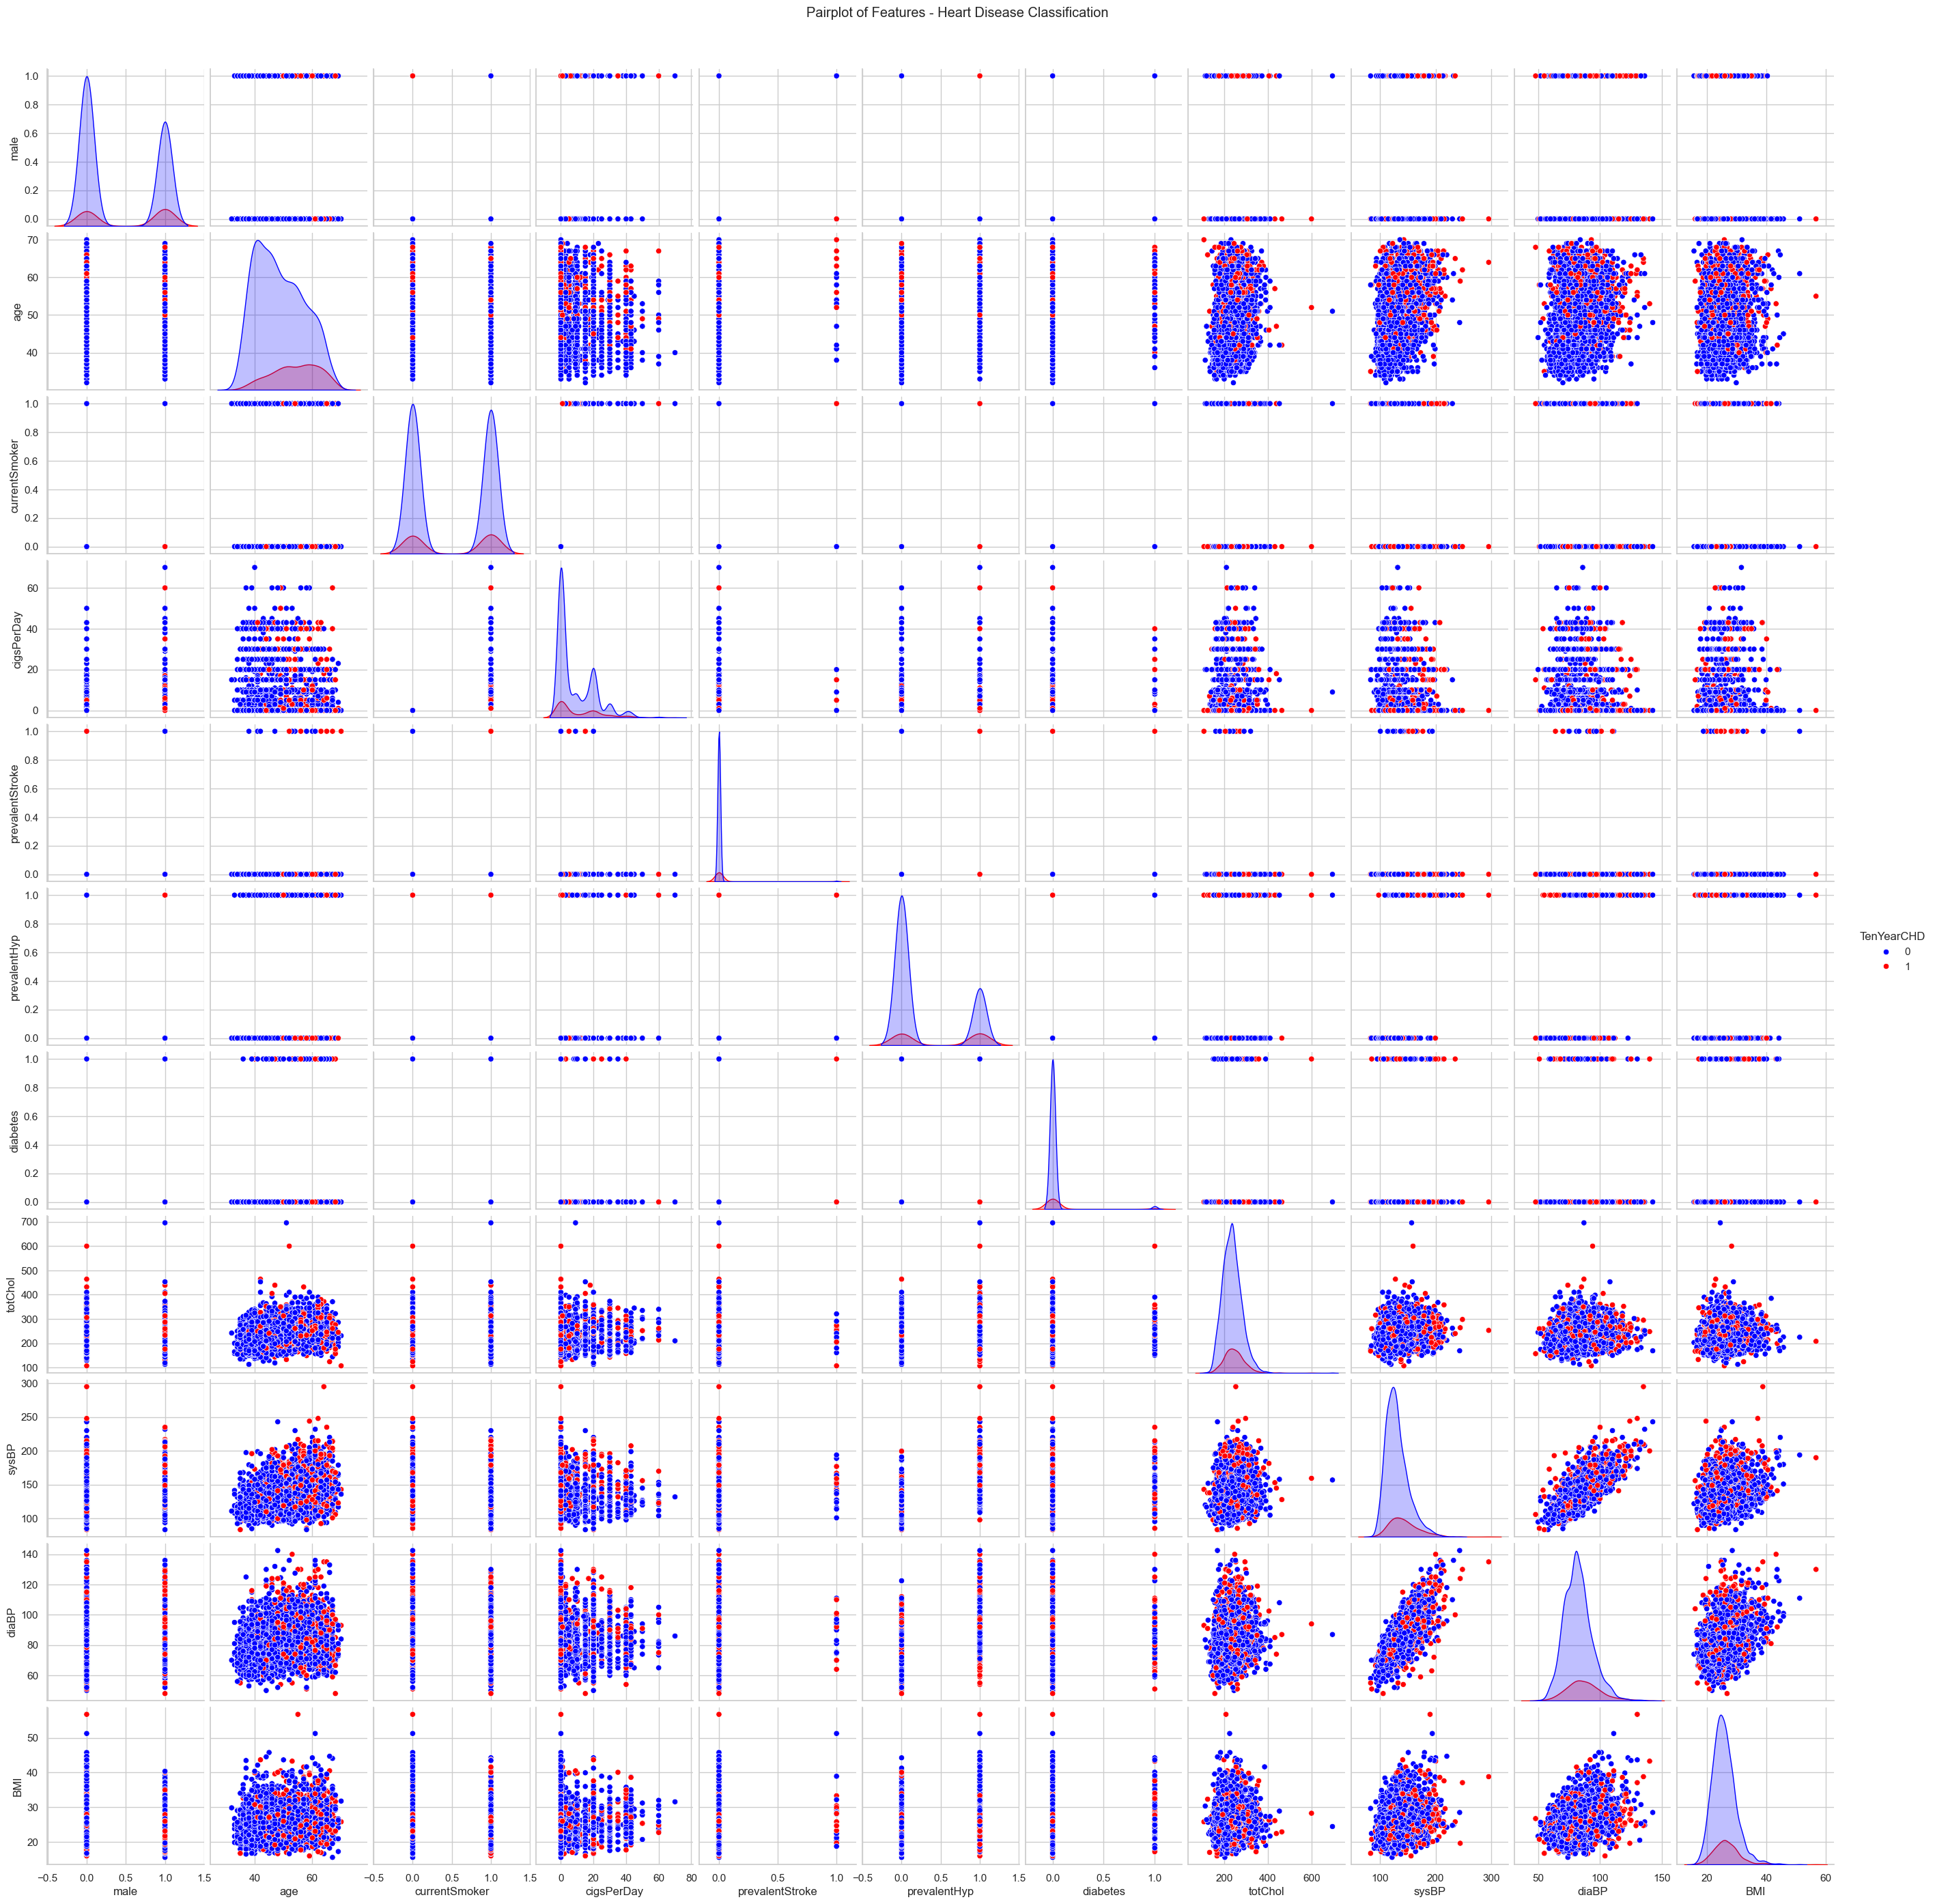

In [11]:
# Set style for seaborn
sns.set(style="whitegrid")

# Scatterplot Matrix (Pairplot) to compare all features
plt.figure(figsize=(12, 10))
sns.pairplot(df, hue="TenYearCHD", diag_kind="kde", palette={0: "blue", 1: "red"})
plt.suptitle("Pairplot of Features - Heart Disease Classification", y=1.02)
plt.show()

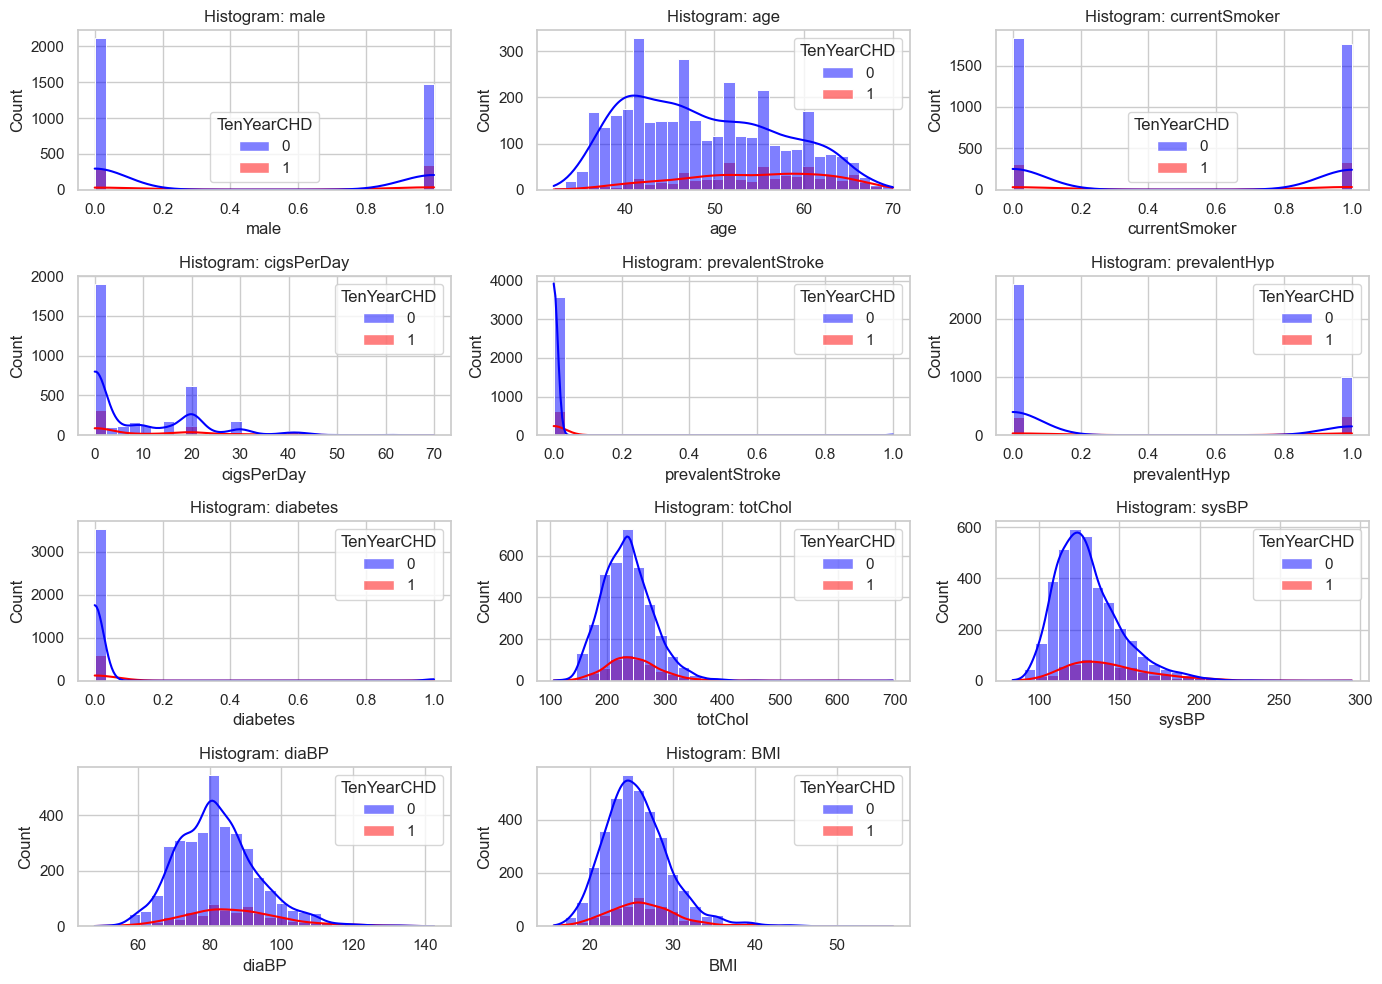

In [12]:
# Plot histograms for all features
df_features = df.drop(columns=["TenYearCHD"])  # Remove target column for histograms

plt.figure(figsize=(14, 10))
for i, col in enumerate(df_features.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df, x=col, hue="TenYearCHD", kde=True, palette={0: "blue", 1: "red"}, bins=30)
    plt.title(f"Histogram: {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

#### **Spliting data to training data and testing data**

In [13]:
# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [14]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Training Logistic Regression model**

In [15]:
# Train Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
# Initialize main window
root = tk.Tk()
root.title("Heart Attack Prediction")
root.geometry("800x750")

def center_window(win, width=400, height=300):
    win.update_idletasks()
    screen_width = win.winfo_screenwidth()
    screen_height = win.winfo_screenheight()
    
    x = (screen_width // 2) - (width // 2)
    y = (screen_height // 2) - (height // 2)
    
    win.geometry(f"{width}x{height}+{x}+{y}")

# Center the root
center_window(root, 800, 750)

# Load video
video_path = "1210-143977098.mp4"  # Replace with your actual video file
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    messagebox.showerror("Error", "Could not open video file!")

# Background label for video
bg_label = tk.Label(root)
bg_label.place(relwidth=1, relheight=1)

# Function to update video frame
def play_video():
    ret, frame = cap.read()
    if ret:
        frame = cv2.resize(frame, (root.winfo_width(), root.winfo_height()))  # Resize to window size
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        img = ImageTk.PhotoImage(Image.fromarray(frame))

        bg_label.config(image=img)
        bg_label.image = img  # Keep reference

        root.after(33, play_video)  # Update every 33ms (~30fps)
    else:
        cap.set(cv2.CAP_PROP_POS_FRAMES, 0)  # Restart video
        play_video()

# Play video in loop
play_video()

def draw_gauge(canvas, risk_percentage, color):
    canvas.delete("all")  # Clear previous drawings
    angle = int((risk_percentage / 100) * 180)  # Convert percentage to gauge angle

    # Background Arc (Full 180° for reference)
    canvas.create_arc(20, 20, 180, 180, start=0, extent=180, style="arc", width=13, outline=color)

    # Foreground Arc (Shows actual risk level)
    canvas.create_arc(20, 20, 180, 180, start=0, extent=180 - angle, style="arc", width=15, outline="lightgray")

    # Display Percentage in Center
    canvas.create_text(100, 120, text=f"{risk_percentage:.2f}%", font=("Arial", 18, "bold"), fill=color)

def animate_gauge(canvas, risk_percentage, color, step=5):
    for i in range(0, int(risk_percentage) + 1, step):
        draw_gauge(canvas, i, color)
        canvas.update()
        canvas.after(30)  # Adjust speed of animation

# Function for prediction
def predict_heart_disease():
    try:
        user_input = [
            int(male_var.get()), float(entry_age.get()), int(smoker_var.get()), 
            float(entry_cigs.get()), int(stroke_var.get()), int(hyper_var.get()), 
            int(diabetes_var.get()), float(entry_chol.get()), float(entry_sysBP.get()), 
            float(entry_diaBP.get()), float(entry_BMI.get())
        ]

        user_df = pd.DataFrame([user_input], columns=X.columns)
        user_df = scaler.transform(user_df)

        logistic_pred = logistic_model.predict(user_df)
        logistic_prob = logistic_model.predict_proba(user_df)[0][1] * 100

        # Determine risk level
        if logistic_prob < 30:
            risk_level = "Low"
            color = "green"
        elif 30 <= logistic_prob < 70:
            risk_level = "Medium"
            color = "orange"
        else:
            risk_level = "High"
            color = "red"

        result_window = Toplevel(root)
        result_window.title("Prediction Result")
        result_window.geometry("400x300")
        result_window.configure(bg="#010621")
        
        # Center the window
        center_window(result_window, 400, 300)

        # Create a frame to center everything
        frame = tk.Frame(result_window, bg="#010621")
        frame.pack(expand=True) 
        
        # Display Text Result
        result_label = tk.Label(
            frame, text=f"Heart Disease Risk: {risk_level}", 
            font=("Arial", 18, "bold"), fg=color, bg="#010621"
        )
        result_label.pack(pady=10)

        # Create Canvas for Gauge
        canvas = tk.Canvas(frame, width=200, height=150, bg="#010621", highlightthickness=0)
        canvas.pack()

        # Animate Gauge
        animate_gauge(canvas, logistic_prob, color)

    except ValueError:
        messagebox.showerror("Input Error", "Please enter valid numeric values.")

# Title label
title_label = tk.Label(root, text="HEART ATTACK PREDICTION", font=("Arial", 18, "bold"), bg="#A10101", fg="white", padx=20, pady=5)
title_label.pack(pady=25)

# Input form
frame = tk.Frame(root, bg="#112FDA", padx=10, pady=10, bd=5, relief="ridge")
frame.pack(pady=25)

def create_label(parent, text, row, column):
    return tk.Label(parent, text=text, fg="white", bg="#112FDA",  padx=7, pady=2,
                    font=("Arial", 12)).grid(row=row, column=column, padx=10, pady=8, sticky="w")

def create_radio_button(parent, text, variable, value, row, column):
    return tk.Radiobutton(parent, text=text, font=("Arial", 10), fg="white", bg="#314DED",
                          activebackground="#314DED", activeforeground="black",
                          cursor="hand2", selectcolor="#01158C", relief="flat",borderwidth=2, indicatoron=0, padx=4,
                          variable=variable, value=value).grid(row=row, column=column, sticky="w", padx=12, pady=3)

create_label(frame, "Gender", row=0, column=0)
male_var = tk.IntVar(value=1)
create_radio_button(frame, "Male", male_var, 1, row=0, column=1)
create_radio_button(frame, "Female", male_var, 0, row=0, column=2)

create_label(frame, "Age", row=1, column=0)
entry_age = tk.Entry(frame)
entry_age.grid(row=1, column=1, columnspan=2, sticky="we", padx=5)

create_label(frame, "Current Smoker", row=2, column=0)
smoker_var = tk.IntVar(value=0)
create_radio_button(frame, "Yes", smoker_var, 1, row=2, column=1)
create_radio_button(frame, "No", smoker_var, 0, row=2, column=2)

create_label(frame, "Cigs Per Day", row=3, column=0)
entry_cigs = tk.Entry(frame)
entry_cigs.grid(row=3, column=1, columnspan=2, sticky="we", padx=5)

create_label(frame, "Prevalent Stroke", row=4, column=0)
stroke_var = tk.IntVar(value=0)
create_radio_button(frame, "Yes", stroke_var, 1, row=4, column=1)
create_radio_button(frame, "No", stroke_var, 0, row=4, column=2)

create_label(frame, "Prevalent Hypertension", row=5, column=0)
hyper_var = tk.IntVar(value=0)
create_radio_button(frame, "Yes", hyper_var, 1, row=5, column=1)
create_radio_button(frame, "No", hyper_var, 0, row=5, column=2)

create_label(frame, "Diabetes", row=6, column=0)
diabetes_var = tk.IntVar(value=0)
create_radio_button(frame, "Yes", diabetes_var, 1, row=6, column=1)
create_radio_button(frame, "No", diabetes_var, 0, row=6, column=2)

create_label(frame, "Total Cholesterol", row=7, column=0)
entry_chol = tk.Entry(frame)
entry_chol.grid(row=7, column=1, columnspan=2, sticky="we", padx=5)

create_label(frame, "Systolic BP", row=8, column=0)
entry_sysBP = tk.Entry(frame)
entry_sysBP.grid(row=8, column=1, columnspan=2, sticky="we", padx=5)

create_label(frame, "Diastolic BP", row=9, column=0)
entry_diaBP = tk.Entry(frame)
entry_diaBP.grid(row=9, column=1, columnspan=2, sticky="we", padx=5)

create_label(frame, "BMI", row=10, column=0)
entry_BMI = tk.Entry(frame)
entry_BMI.grid(row=10, column=1, columnspan=2, sticky="we", padx=5)

# Predict Button
btn_predict = tk.Button(root, text="Predict", command=predict_heart_disease, font=("Arial", 13), bg="#A10101", fg="white", padx=20, pady=5)
btn_predict.pack(pady=20)

# Run the GUI
root.mainloop()

In [ ]:
python --version